<a href="https://colab.research.google.com/github/ShanthiniU/Nurikabe_Solver_ML_Project/blob/main/Nurikabe_Solver_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Phase 1: Puzzle Representation and Basic Validation**

##Step 1: Import and Initialize

In [ ]:
# Import the Numpy library
import numpy as np

# We'll use these constants to make the code readable
UNKNOWN = 0   # Cell state is unknown (not yet solved)
WALL = -1      # Black cell (part of the wall)
ISLAND = -2    # White cell (part of an island)

##Step 2: Representing the Puzzle Grid (5 X 5)

In [ ]:
# Define the puzzle using a 2D Python List
# The grid is 5 rows and 5 columns (5x5)
initial_grid_list = [
    [UNKNOWN, UNKNOWN, 3, UNKNOWN, UNKNOWN],
    [UNKNOWN, UNKNOWN, UNKNOWN, UNKNOWN, 2],
    [UNKNOWN, 1, UNKNOWN, UNKNOWN, UNKNOWN],
    [UNKNOWN, UNKNOWN, UNKNOWN, UNKNOWN, UNKNOWN],
    [4, UNKNOWN, UNKNOWN, UNKNOWN, UNKNOWN]
]

# Grid dimensions (Rows and Columns)
ROWS = len(initial_grid_list)
COLS = len(initial_grid_list[0])

print(f"Grid Size: {ROWS} rows x {COLS} columns")

Grid Size: 5 rows x 5 columns


##Step 3: Converting to a NumPy Array

In [ ]:
# Convert the python list to a NumPy array
nurikabe_grid = np.array(initial_grid_list)

# Nurikabe Grid as a NumPy representation
print("\nNumPy Grid Representation:")
print(nurikabe_grid)


NumPy Grid Representation:
[[0 0 3 0 0]
 [0 0 0 0 2]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [4 0 0 0 0]]


##Step 4: Displaying the Puzzle with Symbolic Characters

Replacing the number codes with symbolic characters as follows:

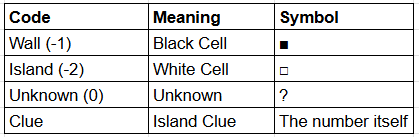

In [ ]:
# Function to print the puzzle grid with symbolic characters

def display_puzzle(grid):
    # We set the cell width to be 3 characters (space + cell + space)
    CELL_WIDTH = 3

    # Calculate border width: (COLS * CELL_WIDTH) + 6 for the cell borders '|'
    border_width = COLS * CELL_WIDTH + 6
    print("-" * border_width)

    for r in range(ROWS):
        row_output = "|"
        for c in range(COLS):
            cell_value = grid[r, c]

            if cell_value == WALL:
                # -1: Wall/Black Cell
                symbol = " \u25A0 " # Black Square (■)
            elif cell_value == ISLAND:
                # -2: Island/White Cell (not a clue)
                symbol = " \u25A1 " # White Square (□)
            elif cell_value == UNKNOWN:
                # 0: Unknown Cell
                symbol = " ? "
            else:
                # Any POSITIVE number (>0) must be a CLUE (1, 2, 3, 4, etc.)
                symbol = str(int(cell_value)).center(CELL_WIDTH)

            row_output += symbol + "|"
        print(row_output)
        print("-" * border_width)

# Re-run your notebook after making these changes!

print("\nFormatted Initial Puzzle:")
display_puzzle(nurikabe_grid)


Formatted Initial Puzzle:
---------------------
| ? | ? | 3 | ? | ? |
---------------------
| ? | ? | ? | ? | 2 |
---------------------
| ? | 1 | ? | ? | ? |
---------------------
| ? | ? | ? | ? | ? |
---------------------
| 4 | ? | ? | ? | ? |
---------------------


##Step 5: Extracting Clue Coordinates

NumPy conditional indexing, np.where() is used to find the indices of the cells with values greater than 0.

In [ ]:
clue_coords_tuple = np.where(nurikabe_grid > 0)
print(clue_coords_tuple)

clues = [(int(r), int(c)) for r, c in zip(clue_coords_tuple[0], clue_coords_tuple[1])]
print("\nClues in Coordinate form, (r, c):")
print(clues)

(array([0, 1, 2, 4]), array([2, 4, 1, 0]))

Clues in Coordinate form, (r, c):
[(0, 2), (1, 4), (2, 1), (4, 0)]
